### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, rfftfreq
from scipy.fftpack import irfft
from scipy.io import wavfile

# Noise Reduction
<b>Steps:</b>
<br>
> 1st - Create a time domain from audio file
<br>
> 2nd - Perform Fast Fourier Transform on audio to change to freqeuncy domain
<br>
> 3rd - Create a audio mask by choosing any peak from the frequency plot (since it is not likely a noise)
<br>
> 4th - If multiple mask are selected, use OR gate to combine them
<br>
> 5th - Multiply power of frequency with mask
<br>
> 6th - Revert frequency domain back to time domain
<br>
> 7th - Write new wav file 
<br>

sample sound from: https://www.signalogic.com/index.pl?page=speech_codec_wav_samples
<br>
https://www.signalogic.com/melp/HAVEnoise/orig/h_orig.wav
 
    

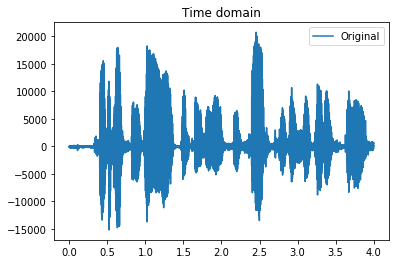

In [2]:
# sample sound from: https://www.signalogic.com/index.pl?page=speech_codec_wav_samples
# https://www.signalogic.com/melp/HAVEnoise/orig/h_orig.wav
# Removing audio noise

# Plotting time domain of sample.wav
# Create a time domain from audio file
freq, y = wavfile.read('images/sample1.wav')
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t,y,label='Original')
plt.title('Time domain')
plt.legend()

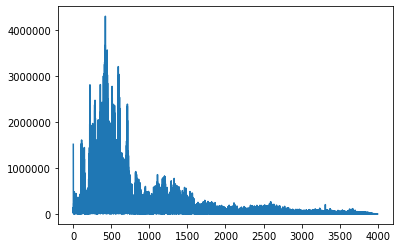

In [3]:
# Fast Fourier Transform y (audio)
# yf = power of freq
# xf = freq

n = len(t)
yf = rfft(y)
xf = rfftfreq(n,dt)
plt.plot(xf,np.abs(yf))

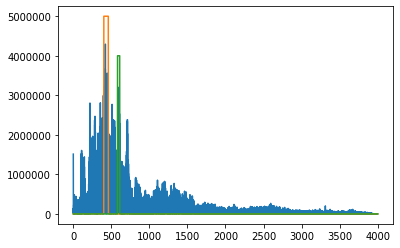

In [4]:
# Create audio mask, choosing peak from plot since it is not likely to be noise
# i choose 2 peak
mask1 = np.where(np.logical_and(xf > 400, xf <460),1,0)
mask2 = np.where(np.logical_and(xf > 580, xf <610),1,0)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask1 * 5e6)
plt.plot(xf, mask2 * 4e6)

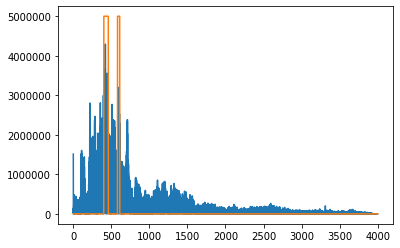

In [5]:
# used OR because we decide to use two peaks
mask = np.logical_or(mask1,mask2)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask * 5e6)

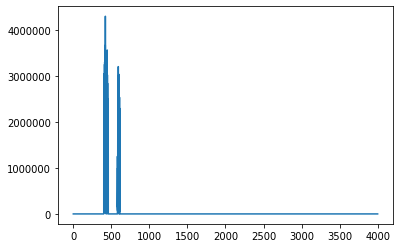

In [6]:
# plot of masked frequency
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

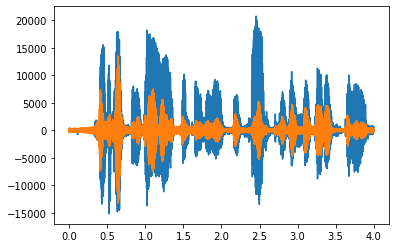

In [7]:
# revert frequency domain back to time domain
new_f_clean = irfft(yf_clean)
plt.plot(t,y)
plt.plot(t, new_f_clean)

#write new wav file
wavfile.write('images/sample1_noise_reduced.wav', freq, np.array(new_f_clean, dtype=np.int16))